In [1]:
from utils.data_utils import load_class_dataset, ToTensorTrans

In [7]:
cifar10_train_ds, cifar10_test_ds = load_class_dataset("CIFAR10", ToTensorTrans)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
cifar10_train_ds.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
cifar10_train_ds.class_to_idx['airplane']

0

In [ ]:
correct_count = {}

In [ ]:
for class_name in cifar10_train_ds.classes:
    class_label = cifar10_train_ds.class_to_idx[class_name]
    correct_count[class_name] += ((predicted == labels) & (labels == cat_label)).sum().item()

In [11]:

def zero_shot_with_each_class_acc(test_dataloader,model,zeroshot_weights,device):
    cat_correct, cat_total = 0,0
    correct_count = {}

    for class_name in test_dataloader.classes:
        correct_count[class_name] = 0
        
    with torch.no_grad():
        top1, top5, n = 0., 0., 0.
        tgt_top1 = 0.
        for i, (images, target) in enumerate(tqdm(test_dataloader)):
            images = images.to(device)
            target = target.to(device)

            image_features = model.encode_image(images)
                    
            image_features /= image_features.norm(dim=-1, keepdim=True)
            logits = 100. * image_features @ zeroshot_weights

            # measure misclassification accuracy
            acc1, acc5 = cal_accuracy(logits, target, topk=(1, 5))
            top1 += acc1
            top5 += acc5
            
            predicted = logits.argmax(1)

            for class_name in cifar10_train_ds.classes:
                class_label = cifar10_train_ds.class_to_idx[class_name]
                correct_count[class_name] += ((predicted == labels) & (labels == class_label)).sum().item()
                
            n += images.size(0)

    top1 = (top1 / n) * 100
    top5 = (top5 / n) * 100
 
    print(f"Top-1 accuracy: {top1}")
    print(f"Top-5 accuracy: {top5}")
    for key in correct_count.keys():
        print("The category {} : acc: {}%".format(key, correct_count[key] / 1000)
    return top1, top5

In [1]:
from utils.data_utils import ImageTextDatasetFromSupervisedDatasetPoison

In [2]:
import torch

In [3]:
noise_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/train_g_unlearn/cat_noise_ori_RN50.pt"

In [4]:
noise = torch.load(noise_path)

In [5]:
noise.shape

torch.Size([3386, 3, 224, 224])

In [6]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion-cat-with-index.json"

In [9]:
import json

In [10]:
json_data = json.load(open(json_path, "r"))

In [11]:
len(json_data)

3386

In [4]:
from torchvision.datasets import  MNIST, CIFAR10, CIFAR100, ImageNet, STL10, GTSRB
import os

In [6]:
unlearnable_train_dataset = STL10(root=os.path.expanduser("~/.cache"), download=True, split='train', transform=None)
test_dataset = STL10(root=os.path.expanduser("~/.cache"), download=True, split='test', transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
unlearnable_train_dataset.classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [10]:
unlearnable_train_dataset.labels

array([1, 5, 1, ..., 1, 7, 5], dtype=uint8)

In [8]:
unlearnable_train_dataset[0]

(<PIL.Image.Image image mode=RGB size=96x96>, 1)

In [13]:
unlearnable_train_dataset.data[0].shape

(3, 96, 96)

### Test new noise limit

In [26]:
import torch
import torch.nn as nn

In [27]:
noise = torch.randn((3,224,224))
epsilon = 16

In [28]:
activation_fn = nn.Tanh()

In [6]:
noise_act = activation_fn(noise)

In [10]:
new_noise= noise_act * epsilon

In [11]:
new_noise

tensor([[[ -8.0257,  -3.2066, -11.6865,  ...,   6.8231,  13.0621,   4.3871],
         [  2.7888, -10.5338,   9.2150,  ...,   6.1965,   4.4260, -13.4028],
         [ -1.1098, -14.0179,  -6.3653,  ...,  12.4304,   7.9795,  10.6626],
         ...,
         [ 15.7209,  10.1521,  -7.6196,  ...,   6.1915,   8.6546,  -7.0962],
         [-12.2375,  -6.6838,  -1.1699,  ...,  11.1405,   1.4089,  -8.1042],
         [  8.3487, -13.4967, -14.2351,  ...,  13.5251,   0.2648,  13.9210]],

        [[-12.5275,   3.6101, -12.4621,  ...,  13.0774,   0.2352, -14.1787],
         [  9.5216,  10.4093,   9.3194,  ..., -14.4976,   6.2690, -12.9974],
         [ -7.5865,  14.4080, -12.8142,  ...,  -8.0115,  12.0777,  -5.5887],
         ...,
         [ -8.7865,  15.3025,  10.7933,  ...,  14.7697, -14.6533, -12.9016],
         [ -3.6213,  -9.2304,  12.4672,  ...,  -5.3924,  -3.7736,  -0.6225],
         [ 12.7814,  -4.1572,  -8.3469,  ...,  14.5863,  14.3668,  13.3752]],

        [[ 11.5873, -15.5403,  15.5853,  ...

In [47]:
from utils.noise_utils import limit_noise_with_activation

In [48]:
output = torch.randn((32,3,224,224))
epsilon = 16

In [49]:
output.shape

torch.Size([32, 3, 224, 224])

In [50]:
activation_fn = nn.Tanh()
    
delta_im = activation_fn(output)
delta_im = delta_im * epsilon / 255. 

In [51]:
delta_im

tensor([[[[-0.0476, -0.0617,  0.0509,  ...,  0.0584, -0.0171, -0.0271],
          [-0.0358,  0.0038,  0.0273,  ...,  0.0471,  0.0458, -0.0432],
          [ 0.0563, -0.0184,  0.0241,  ..., -0.0419,  0.0160, -0.0037],
          ...,
          [-0.0175, -0.0020,  0.0139,  ..., -0.0071, -0.0386,  0.0436],
          [ 0.0152,  0.0282, -0.0531,  ...,  0.0155, -0.0299, -0.0050],
          [-0.0247, -0.0526,  0.0435,  ...,  0.0127, -0.0281, -0.0074]],

         [[-0.0115,  0.0241,  0.0328,  ..., -0.0532, -0.0517,  0.0431],
          [ 0.0048,  0.0517,  0.0326,  ..., -0.0096, -0.0388,  0.0145],
          [-0.0478, -0.0144, -0.0270,  ..., -0.0189,  0.0495, -0.0118],
          ...,
          [-0.0522, -0.0601, -0.0570,  ...,  0.0266,  0.0259,  0.0485],
          [ 0.0077, -0.0444,  0.0587,  ...,  0.0610,  0.0368,  0.0156],
          [ 0.0603,  0.0390,  0.0476,  ..., -0.0017, -0.0518, -0.0338]],

         [[ 0.0339, -0.0517, -0.0210,  ...,  0.0500,  0.0549,  0.0423],
          [-0.0139,  0.0411, -

In [43]:
import torch.nn.functional as F

In [52]:
delta_im1 = F.interpolate(delta_im, (224,224))

In [36]:
noise.shape

torch.Size([32, 3, 224, 224])

In [46]:
delta_im.shape

torch.Size([32, 3, 32, 32])

In [53]:
delta_im.eq(delta_im)

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...

### 1.KORNIA使用

In [9]:
### reference：https://zhuanlan.zhihu.com/p/380701859

In [10]:
## official: https://kornia.readthedocs.io/en/latest/augmentation.container.html

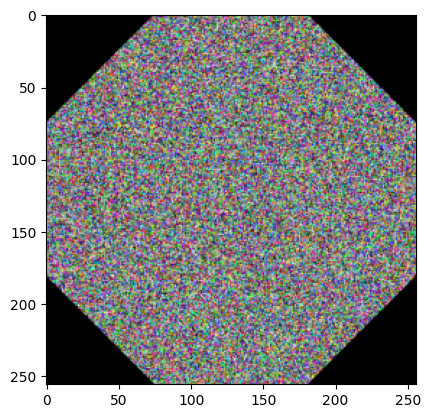

In [3]:
import kornia
import torch
import matplotlib.pyplot as plt
# 创建一个输入图像张量
input_tensor = torch.rand(1, 3, 256, 256)

# 对输入图像进行旋转变换
output_tensor = kornia.geometry.rotate(input_tensor, torch.tensor([45.0]))

# 显示变换后的图像
plt.imshow(output_tensor.squeeze().permute(1, 2, 0).numpy())
plt.show()

In [6]:
from kornia.augmentation.container import AugmentationSequential

In [46]:
import torch
from torchvision import transforms
from PIL import Image

image_path = "./temp1.png"
image = Image.open(image_path)

transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),           
])

image_tensor = transform(image)

image_tensor = image_tensor.unsqueeze(0)

print(image_tensor.shape)  


torch.Size([1, 3, 224, 224])


(224, 224, 3)


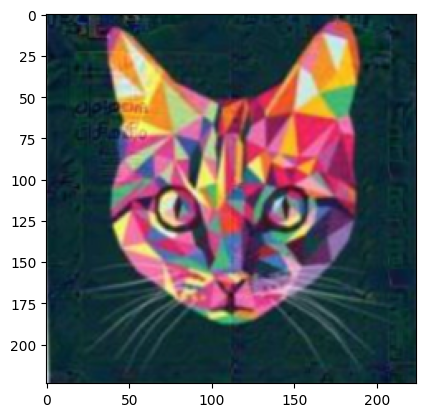

In [49]:
image_array = (image_tensor.squeeze(0)).permute(1, 2, 0).numpy()
print(image_array.shape)

plt.imshow(image_array)

In [143]:
aug_list = AugmentationSequential(
    kornia.augmentation.ColorJitter(0.1, 0.1, 0.1, 0.1, p=1.0),
    kornia.augmentation.RandomAffine(360, [0.1, 0.1], [0.7, 1.2], [30., 50.], p=0.4),
    kornia.augmentation.RandomPerspective(0.9, p=0.5),
    kornia.augmentation.RandomResizedCrop(image_array.shape[-3:-1], (1,1.4)),
    data_keys=["input"],
    same_on_batch=False,
    keepdim=True
)
# forward the operation
out_tensors = aug_list(image_tensor)
# # Inverse the operation
# out_tensor_inv = aug_list.inverse(*out_tensors)

In [146]:
from utils.data_utils import augmentations_kornia

In [155]:
out_tensors = augmentations_kornia(out_tensors)

(224, 224, 3)


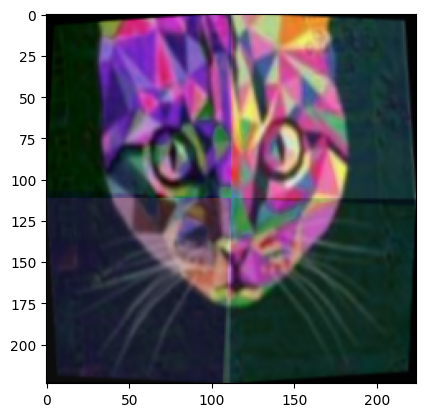

In [156]:
image_array = (out_tensors.squeeze(0)).permute(1, 2, 0).numpy()
print(image_array.shape)
plt.imshow(image_array)

In [11]:
import torch

In [12]:
cp_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage1_train_g_unlearn/gen_all/checkpoint/generator_best_epoch-214_loss-0.11523310208746033.pth"

In [13]:
checkpoint = torch.load(cp_path)

In [14]:
checkpoint.keys()

odict_keys(['module.conv_mask.0.weight', 'module.conv_mask.0.bias', 'module.conv_mask.1.weight', 'module.conv_mask.1.bias', 'module.conv_mask.1.running_mean', 'module.conv_mask.1.running_var', 'module.conv_mask.1.num_batches_tracked', 'module.conv_mask.3.weight', 'module.conv_mask.3.bias', 'module.fc.weight', 'module.fc.bias', 'module.block0.gamma', 'module.block0.c1.weight', 'module.block0.c1.bias', 'module.block0.c2.weight', 'module.block0.c2.bias', 'module.block0.affine0.batch_norm2d.running_mean', 'module.block0.affine0.batch_norm2d.running_var', 'module.block0.affine0.batch_norm2d.num_batches_tracked', 'module.block0.affine0.fc_gamma.linear1.weight', 'module.block0.affine0.fc_gamma.linear1.bias', 'module.block0.affine0.fc_gamma.linear2.weight', 'module.block0.affine0.fc_gamma.linear2.bias', 'module.block0.affine0.fc_beta.linear1.weight', 'module.block0.affine0.fc_beta.linear1.bias', 'module.block0.affine0.fc_beta.linear2.weight', 'module.block0.affine0.fc_beta.linear2.bias', 'modu

In [15]:
from models.model_gan_generator import NetG

In [16]:
text_embedding_dim = 512

reference: https://blog.csdn.net/Coco_W/article/details/129961935

In [19]:
generator = NetG(ngf=text_embedding_dim//8)
generator = generator.to('cuda:0')

generator.load_state_dict({k.replace('module.',''):v for k,v in checkpoint.items()})

<All keys matched successfully>

In [21]:
'module.' in list(checkpoint.keys())[0]

True

In [22]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion_cifar10.json"

In [23]:
import json

In [29]:
json_data = json.load(open(json_path, 'r', encoding='utf-8'))

In [30]:
json_data[0]

{'caption': '3d illustration of four engine commercial airplane isolated on white background',
 'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/airplane/00000/00000000005.jpg',
 'dataset': 'cifar10',
 'class': 'airplane',
 'index': 0}